In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('Pred_result.csv', sep=',', delimiter=None)
df

,xmin,ymin,xmax,ymax,confidence,class,name
0,710.334045,418.143616,725.353333,431.740479,0.516291,0,ball
1,710.434143,419.193451,730.669495,437.913605,0.663287,0,ball
2,711.796509,419.313049,732.544067,438.706055,0.601801,0,ball
3,713.487732,421.856720,735.621399,442.312347,0.643319,0,ball
4,713.260681,425.394318,737.392029,445.788666,0.766230,0,ball
...,...,...,...,...,...,...,...
95,1011.691223,422.776245,1035.038330,443.930908,0.772324,0,ball
96,1017.491882,425.914093,1041.792236,446.584808,0.749853,0,ball
97,1027.654053,432.556488,1049.521729,452.262054,0.676887,0,ball
98,1033.934082,437.244690,1059.465576,460.291321,0.715137,0,ball


In [3]:
df2 = pd.read_csv('GroundTruth.csv', sep=',', delimiter=None)
df2

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,ball,710,418,15,14,left002001.png,1280,720
1,ball,715,419,16,15,left002002.png,1280,720
2,ball,716,422,15,14,left002003.png,1280,720
3,ball,717,423,15,15,left002004.png,1280,720
4,ball,720,428,15,14,left002005.png,1280,720
...,...,...,...,...,...,...,...,...
95,ball,1015,428,16,13,left002096.png,1280,720
96,ball,1026,430,16,15,left002097.png,1280,720
97,ball,1033,435,17,17,left002098.png,1280,720
98,ball,1043,441,16,14,left002099.png,1280,720


In [4]:
x1 = df2['bbox_x']
y1 = df2['bbox_y']
x2 = df['xmin']
y2 = df['ymin']

In [5]:
xval = abs(df['xmin'] - df2['bbox_x'])
yval = abs(df['ymin'] - df2['bbox_y'])

In [6]:
xval

0     0.334045
1     4.565857
2     4.203491
3     3.512268
4     6.739319
        ...   
95    3.308777
96    8.508118
97    5.345947
98    9.065918
99    4.415283
Length: 100, dtype: float64

In [7]:
yval

0     0.143616
1     0.193451
2     2.686951
3     1.143280
4     2.605682
        ...   
95    5.223755
96    4.085907
97    2.443512
98    3.755310
99    5.022797
Length: 100, dtype: float64

In [8]:
# err = sqrt((xval[2])**2 - (yval[2])**2)
v = []
for i in range(0,100):
    e = math.sqrt(abs((xval[i])**2 - (yval[i])**2))
    v.append(e)

In [9]:
f = pd.DataFrame(v)
f

,0
0,0.301597
1,4.561757
2,3.232589
3,3.320984
4,6.215211
...,...
95,4.042228
96,7.462803
97,4.754829
98,8.251577


In [10]:
ade = (np.sum(v))/100
ade

2.6053745322768225

In [11]:
for a in range(len(x2)):
    y = x2[a]
    z = y2[a]
    c = x1[a]
    d = y1[a]
    a += 1

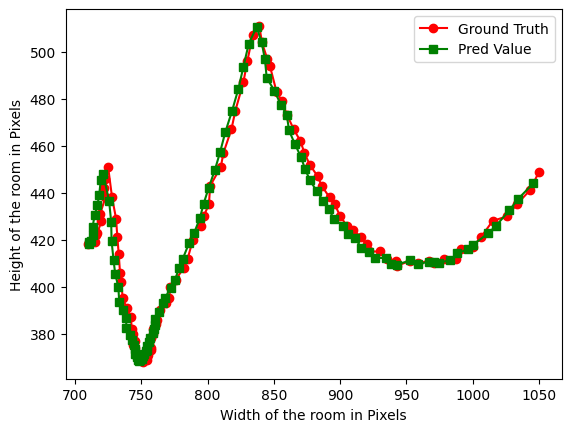

In [5]:
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x2, y2, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [13]:
def Displacement_Error(x1, y1, x2, y2):
    dis_err = sqrt((x2-x1)**2 + (y2-y1)**2)
    return dis_err 

In [14]:
count = 0
for i in range(len(x1)):
    predicted_coordinates = list(zip(x2,y2))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [15]:
# predicted_coordinates

In [16]:
f_x2 = f_x2(i for i in df['xmin'])
g_y2 = [i for i in df['ymin']]
h_x1 = [i for i in df2['bbox_x']]
j_y1 = [i for i in df2['bbox_y']]

NameError: name 'f_x2' is not defined

In [17]:
y = [z for z in x2]
print(y[1])
    # d = df.iloc[0]
    # print(d)

710.434143


In [18]:
predicted_coordinates[0][0]

710.334045

In [19]:
ground_coordinates[0][0]

710

In [13]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

# predicted_coordinates = [[1, 2], [3, 4], [5, 6], [7, 8]]
# ground_truth_coordinates = [[2, 3], [4, 5], [6, 7], [8, 9]]


In [14]:
#Average Mahalanobis Distance (AMD)
from scipy.spatial.distance import mahalanobis
def avg_mahalanobis_distance(predicted, ground_truth):
    
    predicted = np.array(predicted)
    ground_truth = np.array(ground_truth)
    mean_predicted = np.mean(predicted, axis=0)
    mean_ground_truth = np.mean(ground_truth, axis=0)
    cov_predicted = np.cov(predicted.T)
    cov_ground_truth = np.cov(ground_truth.T)
    inv_cov_predicted = np.linalg.inv(cov_predicted)
    inv_cov_ground_truth = np.linalg.inv(cov_ground_truth)
    error = 0
    for i in range(len(predicted)):
        error += mahalanobis(predicted[i], ground_truth[i], inv_cov_predicted + inv_cov_ground_truth)
    return error / len(predicted)


In [22]:
error = avg_mahalanobis_distance(predicted_coordinates, ground_coordinates)
print(error)


0.06328234558949965


In [17]:
import numpy as np

def final_displacement_error(desired_path, actual_path):
    # Extract the final position from each path
    final_desired = desired_path[-1, :]
    final_actual = actual_path[-1, :]
    # Calculate the error as the difference between the two positions
    error = final_desired - final_actual
    return error


New Yolov5 based detection result. Trained using 2165 frames.

In [8]:
df_new = pd.read_csv('NewYolov5.csv', sep=',', delimiter=None)
df_new

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,ball,712,417,12,13,left002001.png,1280,720
1,ball,710,418,19,19,left002002.png,1280,720
2,ball,716,424,15,16,left002004.png,1280,720
3,ball,718,428,15,16,left002005.png,1280,720
4,ball,718,431,17,17,left002006.png,1280,720
...,...,...,...,...,...,...,...,...
91,ball,1009,422,12,13,left002095.png,1280,720
92,ball,1016,425,14,15,left002096.png,1280,720
93,ball,1024,430,14,14,left002097.png,1280,720
94,ball,1034,437,12,13,left002098.png,1280,720


In [9]:
x1 = df2['bbox_x']
y1 = df2['bbox_y']
x2 = df_new['bbox_x']
y2 = df_new['bbox_y']

In [10]:
count = 0
for i in range(len(x1)):
    predicted_coordinates = list(zip(x2,y2))
    ground_coordinates = list(zip(x1,y1))
    count += 1

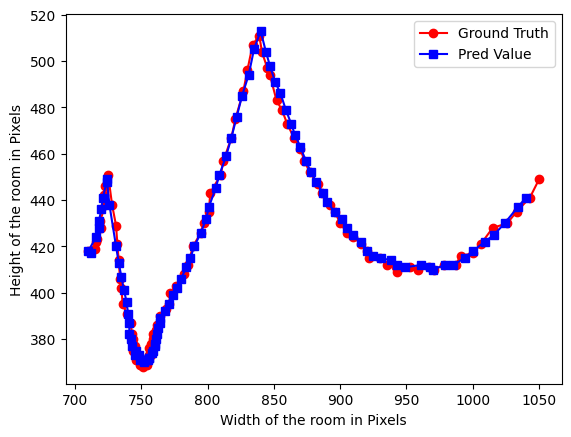

In [11]:
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x2, y2, marker='s', color='blue', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [15]:

error = avg_displacement_error(predicted_coordinates, ground_coordinates)
print(error)


12.621902809746407


In [19]:
err = avg_mahalanobis_distance(predicted_coordinates, ground_coordinates)
err

0.36381323169869045

Yolov8 New

In [20]:
df_new2 = pd.read_csv('NewYolov8.csv', sep=',', delimiter=None)
df_new2

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,ball,713,418,11,11,left002001.png,1280,720
1,ball,715,420,13,12,left002002.png,1280,720
2,ball,715,417,16,18,left002003.png,1280,720
3,ball,718,424,14,14,left002004.png,1280,720
4,ball,718,427,15,15,left002005.png,1280,720
...,...,...,...,...,...,...,...,...
91,ball,1014,424,18,17,left002096.png,1280,720
92,ball,1022,428,18,17,left002097.png,1280,720
93,ball,1030,433,19,17,left002098.png,1280,720
94,ball,1039,440,18,17,left002099.png,1280,720


In [21]:
x3 = df_new2['bbox_x']
y3 = df_new2['bbox_y']

count = 0
for i in range(len(x1)):
    predicted_coordinates2 = list(zip(x3,y3))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [22]:
error2 = avg_displacement_error(predicted_coordinates2, ground_coordinates)
print(error2)

8.685011657213117


In [23]:
error3 = avg_mahalanobis_distance(predicted_coordinates2, ground_coordinates)
print(error3)

0.2221698507138724


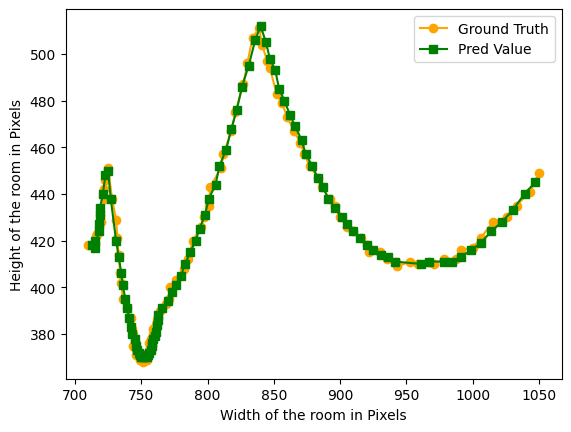

In [24]:
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='orange', label='Ground Truth')
plt.plot(x3, y3, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

Yolov7

In [25]:
df_new3 = pd.read_csv('NewYolov7.csv', sep=',', delimiter=None)
df_new3

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,ball,718,426,13,13,left002004.png,1280,720
1,ball,719,429,14,15,left002005.png,1280,720
2,ball,722,433,14,15,left002006.png,1280,720
3,ball,724,438,13,14,left002007.png,1280,720
4,ball,730,440,14,14,left002011.png,1280,720
...,...,...,...,...,...,...,...,...
100,ball,1008,422,16,14,left002095.png,1280,720
101,ball,1014,425,18,17,left002096.png,1280,720
102,ball,1023,429,18,17,left002097.png,1280,720
103,ball,1031,435,18,16,left002098.png,1280,720


In [26]:
x4 = df_new3['bbox_x']
y4 = df_new3['bbox_y']

count = 0
for i in range(len(x1)):
    predicted_coordinates3 = list(zip(x4[:100],y4[:100]))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [27]:
error3 = avg_displacement_error(predicted_coordinates3, ground_coordinates)
print(error3)

44.389438191394746


In [28]:
error4 = avg_mahalanobis_distance(predicted_coordinates3, ground_coordinates)
print(error4)

1.20741465653928


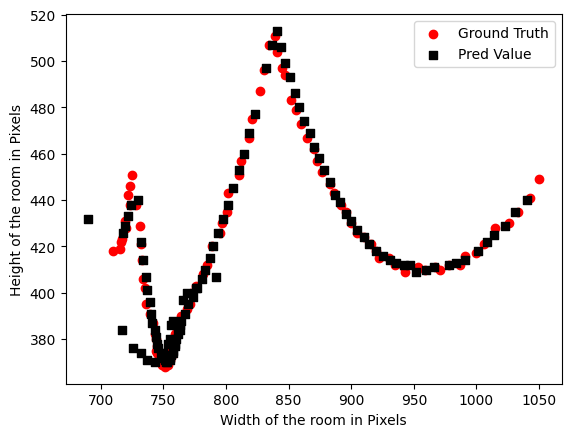

In [29]:
from matplotlib import markers
plt.scatter(x1, y1, marker='o', color='red', label='Ground Truth')
plt.scatter(x4, y4, marker='s', color='black', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

Yolov8 Tracking Strong Sort and DeepOCsort

In [ ]:
df5 = pd.read_csv('TestVid2_deepocsort.csv', sep=',', delimiter=None)
df5

,num,x,y,h,w
0,0,718,426,13,11
1,1,719,429,14,14
2,2,720,432,15,14
3,3,722,438,14,13
4,4,723,442,16,15
...,...,...,...,...,...
90,90,1015,425,16,16
91,91,1024,430,14,15
92,92,1031,435,16,16
93,93,1040,440,16,16


In [ ]:
x5 = df5['x']
y5 = df5['y']

count = 0
for i in range(len(x1)):
    predicted_coordinates5 = list(zip(x5,y5))
    ground_coordinates = list(zip(x1,y1))
    count += 1
    
error5 = avg_displacement_error(predicted_coordinates5, ground_coordinates)
print(error5)

23.736676605772765


In [ ]:
error6 = avg_mahalanobis_distance(predicted_coordinates5, ground_coordinates)
error6

0.7075611410542334

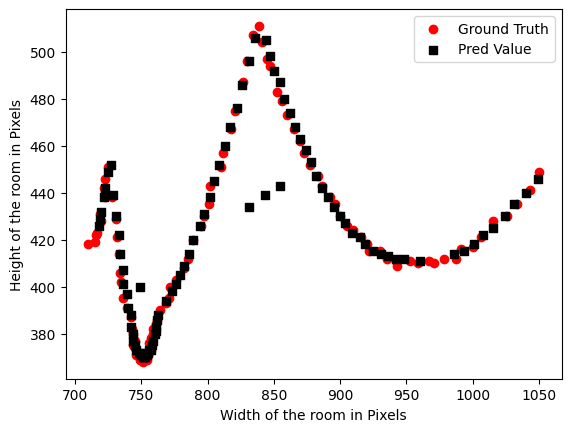

In [ ]:
from matplotlib import markers
plt.scatter(x1, y1, marker='o', color='red', label='Ground Truth')
plt.scatter(x5, y5, marker='s', color='black', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [ ]:
df6 = pd.read_csv('TestVid2_strongsort.csv', sep=',', delimiter=None)
df6

,x,y,h,w
0,744,377,13,13
1,744,374,14,14
2,745,372,14,14
3,747,371,13,14
4,748,371,14,13
...,...,...,...,...
59,1015,425,15,15
60,1023,429,15,16
61,1031,435,15,15
62,1039,439,17,17


In [ ]:
x6 = df6['x']
y6 = df6['y']

count = 0
for i in range(len(x1)):
    predicted_coordinates6 = list(zip(x6,y6))
    ground_coordinates = list(zip(x1,y1))
    count += 1
    
error7 = avg_displacement_error(predicted_coordinates6, ground_coordinates)
print(error7)

100.59208982498524


In [ ]:
error8 = avg_mahalanobis_distance(predicted_coordinates6, ground_coordinates)
error8

2.8563307693159654

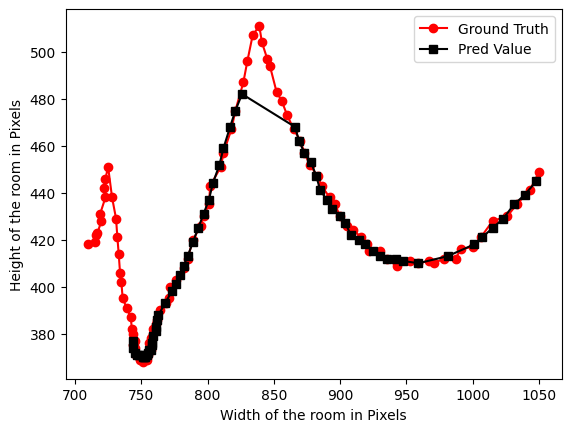

In [ ]:
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x6, y6, marker='s', color='black', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [39]:
#Matlab Code based detection
df7 = pd.read_csv('ball_positionMay18.csv', sep=',', delimiter=None)
df7

,Filename,X,Y
0,left002000.png,1216.590,640.1717
1,left002001.png,1217.112,639.1717
2,left002002.png,1182.112,634.1717
3,left002003.png,1217.878,639.2045
4,left002004.png,1258.846,670.9414
...,...,...,...
95,left002096.png,1257.934,653.1310
96,left002097.png,1217.080,639.4810
97,left002098.png,1182.712,621.6172
98,left002099.png,1216.712,638.1203


In [52]:
x7 = df7[' X ']
y7 = df7['Y ']
count = 0
for i in range(len(x1)):
    predicted_coordinates7 = list(zip(x7,y7))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [53]:
error9 = avg_displacement_error(predicted_coordinates7, ground_coordinates)
print(error9)

453.7825896768731


In [54]:
error10 = avg_mahalanobis_distance(predicted_coordinates7, ground_coordinates)
error10

21.209157444470076

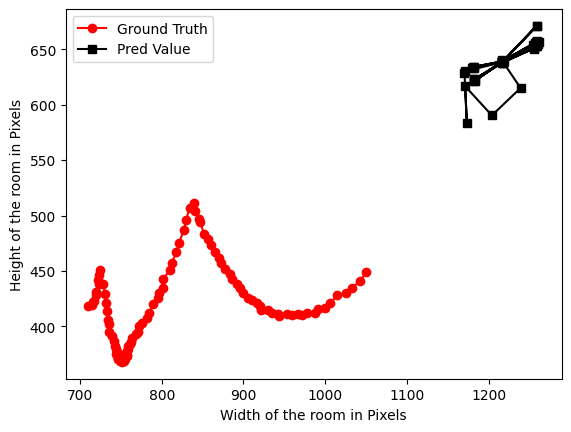

In [55]:
#plot df7 with ground truth
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x7, y7, marker='s', color='black', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [56]:
df8 = pd.read_csv('ball_positionMay19.csv', sep=',', delimiter=None)
df8

,Filename,X,Y
0,left002013.png,614.9888,310.9888
1,left002014.png,1217.1160,640.0326
2,left002015.png,1182.1400,633.1618
3,left002016.png,1217.6800,638.7149
4,left002017.png,1255.0320,650.5364
...,...,...,...
83,left002096.png,1257.8640,653.1398
84,left002097.png,1217.0100,639.4898
85,left002098.png,1182.6420,621.6260
86,left002099.png,1216.6420,638.1291


In [57]:
x8 = df8[' X ']
y8 = df8['Y ']

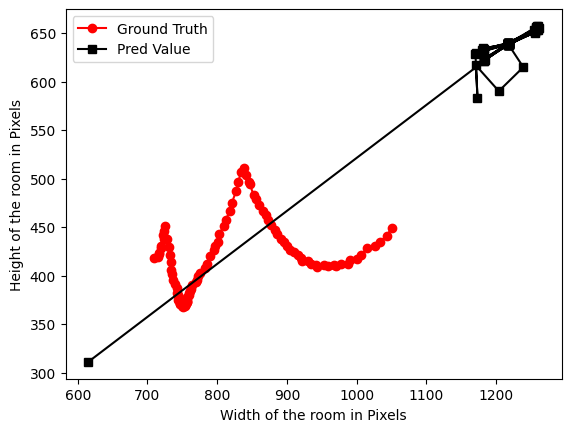

In [58]:
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x8, y8, marker='s', color='black', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [59]:
df9 = pd.read_csv('ball_position1.csv', sep=',', delimiter=None)
df9

,Filename,X,Y
0,left002013.png,684.2086,443.2080
1,left002014.png,718.3962,436.7180
2,left002015.png,697.5818,429.4624
3,left002016.png,692.0303,424.4003
4,left002017.png,686.8663,418.1454
...,...,...,...
83,left002096.png,788.3943,450.9502
84,left002097.png,791.8370,446.2584
85,left002098.png,805.4787,472.4194
86,left002099.png,803.3620,455.4702


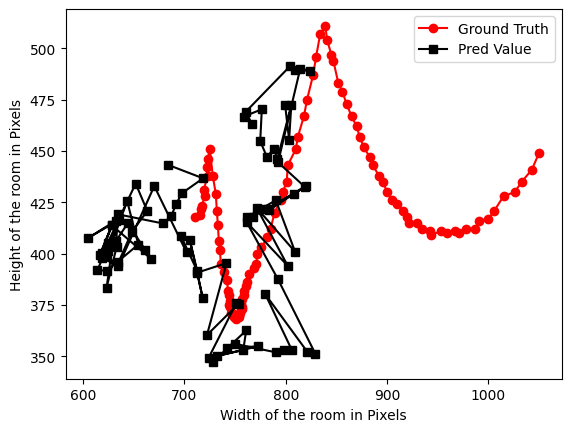

In [60]:
#plot df9 with ground truth
x9 = df9[' X ']
y9 = df9['Y ']
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x9, y9, marker='s', color='black', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()